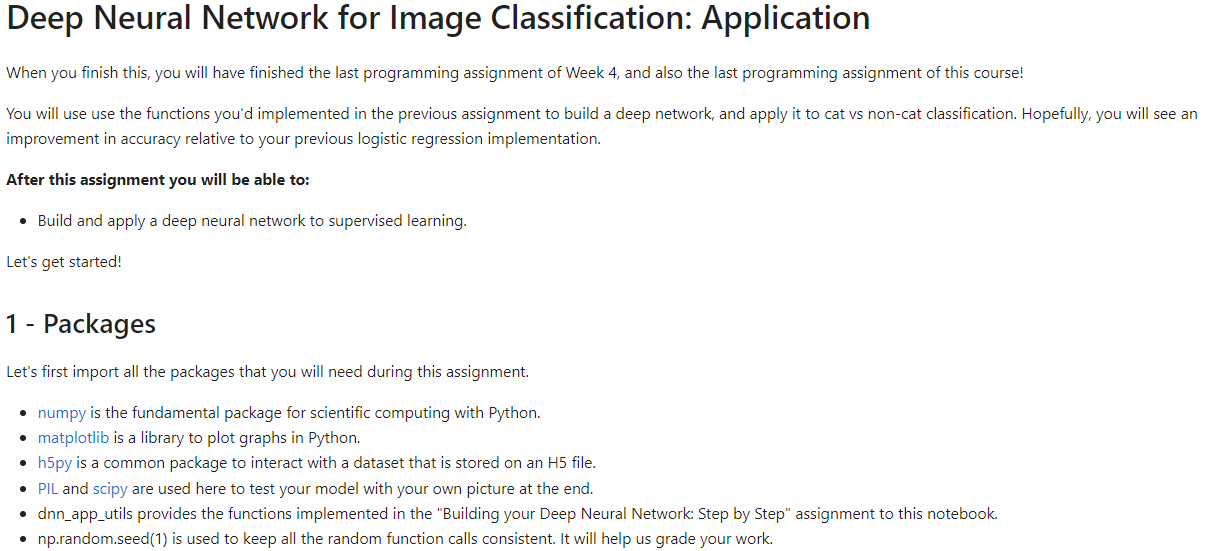

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils import *
from lr_utils import load_dataset

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

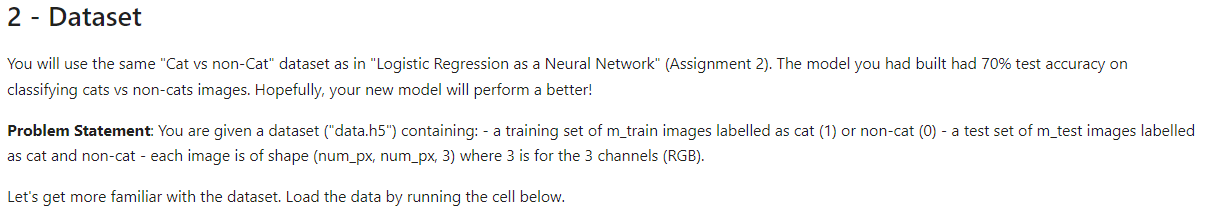

y = 0. It's a non-cat picture.
Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


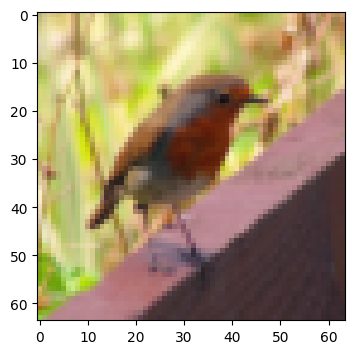

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0, index]) + ". It's a " + classes[train_y[0, index]].decode("utf-8") + " picture.")

# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

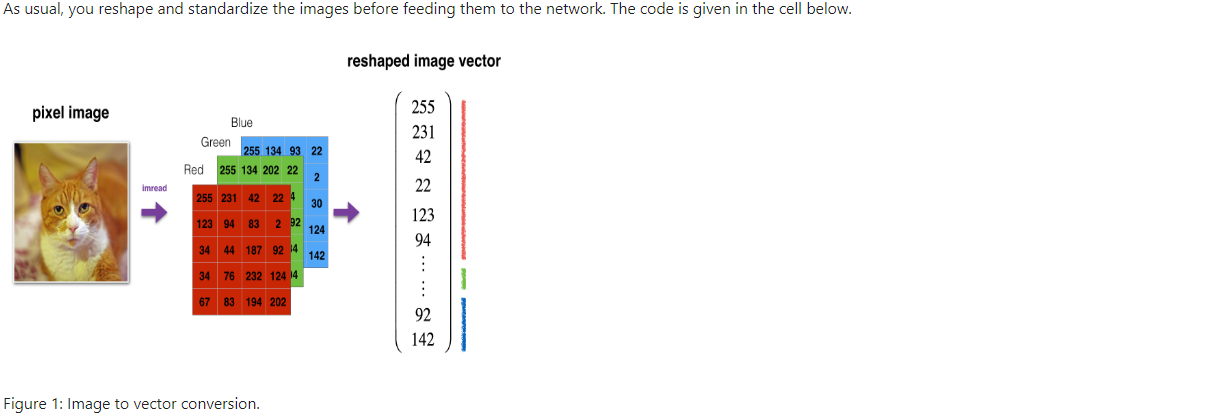

In [3]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


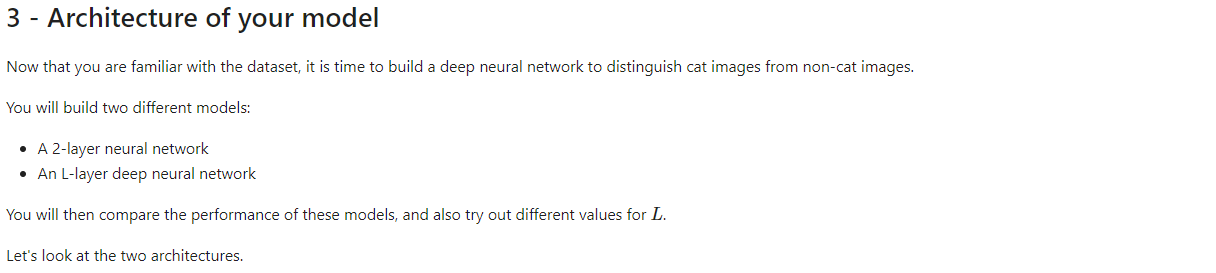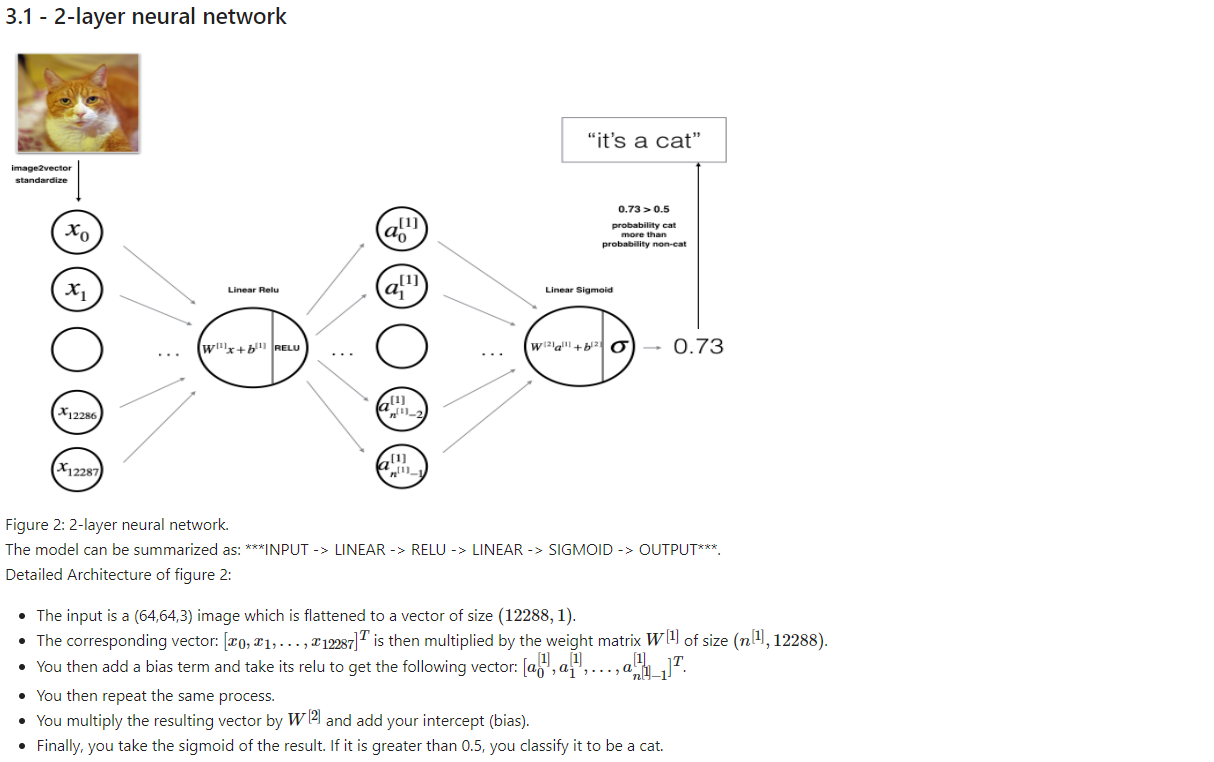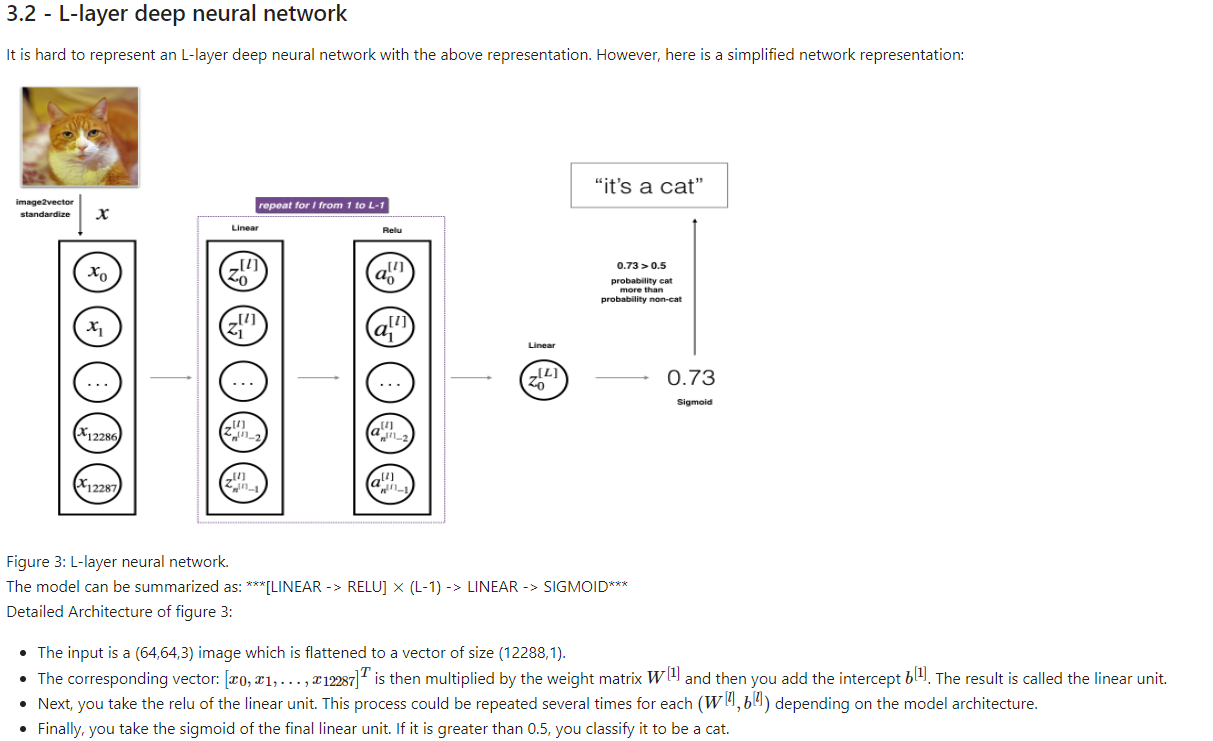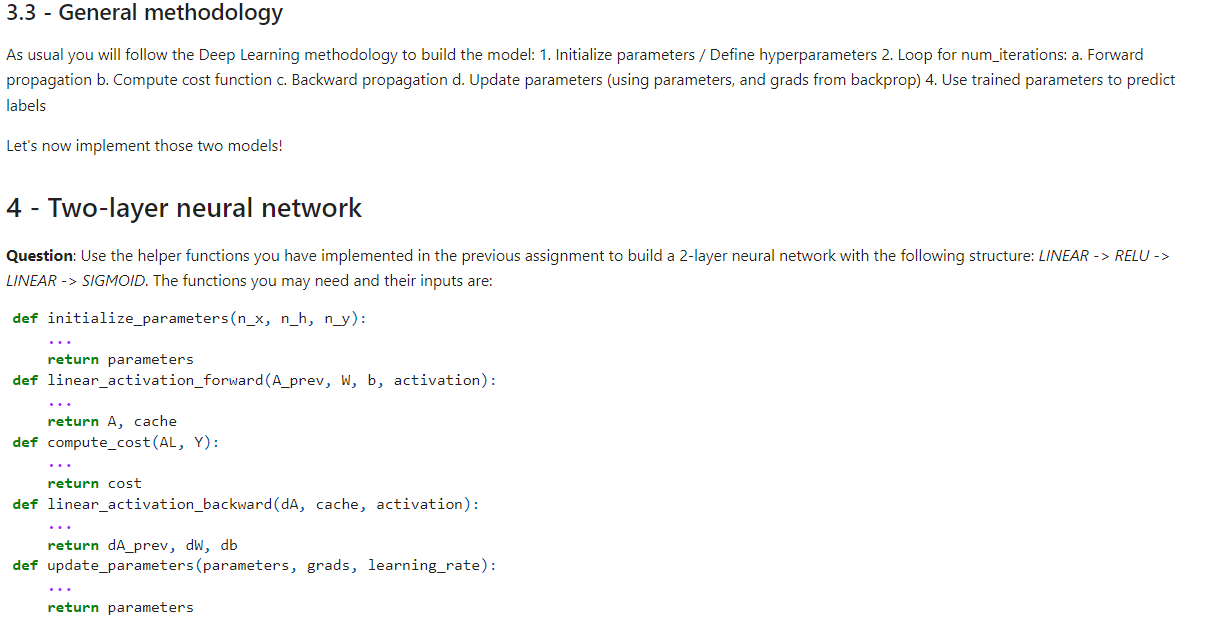

In [4]:
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

Cost after iteration 0: 0.6930497356599891
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.515830477276473
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.40079775362038855
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366414
Cost after iteration 1100: 0.30527536361962654
Cost after iteration 1200: 0.27491377282130175
Cost after iteration 1300: 0.24681768210614835
Cost after iteration 1400: 0.19850735037466108
Cost after iteration 1500: 0.17448318112556638
Cost after iteration 1600: 0.17080762978096492
Cost after iteration 1700: 0.11306524562164726
Cost after iteration 1800: 0.09629426845937158
Cost after iteration 1900: 0.08342617959726865
Cost after iteration 2000: 0.07439078704319083
Cost after iteration 2100: 0.066307

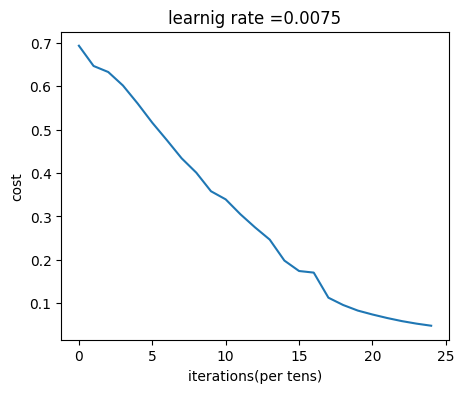

In [5]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []
    
    for i in range(num_iterations):
        # 前向传播
        caches = []
        A1, cache = linear_activation_forward(X, parameters["W1"], parameters["b1"], "relu")
        caches.append(cache)
        A2, cache = linear_activation_forward(A1, parameters["W2"], parameters["b2"], "sigmoid")
        caches.append(cache)
        
        # 损失函数
        cost = compute_cost(A2, Y)
        
        # 计算梯度信息
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, caches[1], activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, caches[0], activation="relu")
        grads = {"dA2": dA2, "dW2": dW2, "db2": db2, "dA1": dA1, "dW1": dW1, "db1": db1}
        
        # 梯度下降
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost == True and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel("cost")
    plt.xlabel("iterations(per tens)")
    plt.title("learnig rate =" + str(learning_rate))
    plt.show()
            
    return parameters

parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [6]:
predictions_train = predict(train_x, train_y, parameters)
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 1.0
Accuracy: 0.72


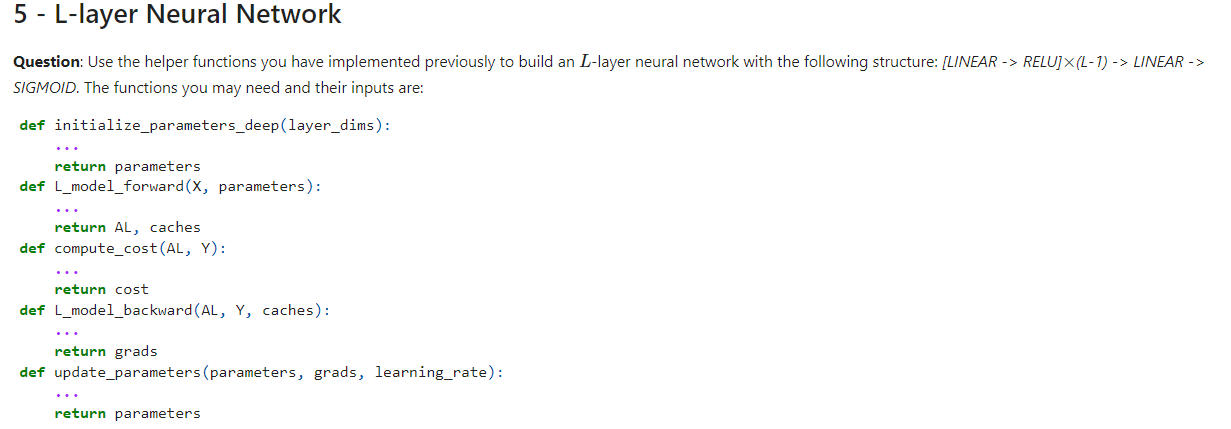

Cost after iteration 0: 0.715731513413713
Cost after iteration 100: 0.6747377593469113
Cost after iteration 200: 0.6603365433622128
Cost after iteration 300: 0.6462887802148751
Cost after iteration 400: 0.6298131216927773
Cost after iteration 500: 0.606005622926534
Cost after iteration 600: 0.5690041263975135
Cost after iteration 700: 0.519796535043806
Cost after iteration 800: 0.46415716786282285
Cost after iteration 900: 0.40842030048298916
Cost after iteration 1000: 0.37315499216069054
Cost after iteration 1100: 0.3057237457304712
Cost after iteration 1200: 0.2681015284774085
Cost after iteration 1300: 0.23872474827672546
Cost after iteration 1400: 0.20632263257914704
Cost after iteration 1500: 0.17943886927493496
Cost after iteration 1600: 0.15798735818800919
Cost after iteration 1700: 0.14240413012273553
Cost after iteration 1800: 0.12865165997883937
Cost after iteration 1900: 0.112443149981495
Cost after iteration 2000: 0.0850563103495609
Cost after iteration 2100: 0.057583911985

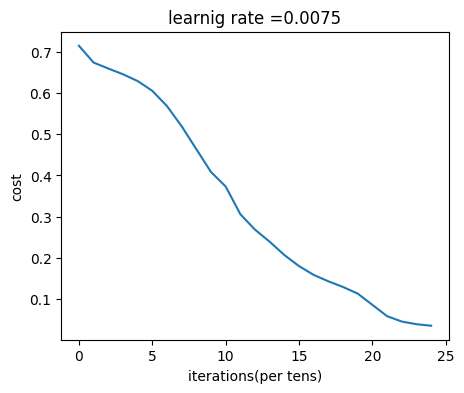

In [11]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model

def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False): #lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(1)
    L = len(layers_dims) - 1
    parameters = initialize_parameters_deep(layers_dims)
    costs = []
    
    for i in range(num_iterations):
        # 前向传播
        AL, caches = L_model_forward(X, parameters)
        
        # 计算损失
        cost = compute_cost(AL, Y)
        
        # 计算梯度
        grads = L_model_backward(AL, Y, caches)
        
        # 更新参数
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # 打印损失
        if print_cost == True and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel("cost")
    plt.xlabel("iterations(per tens)")
    plt.title("learnig rate =" + str(learning_rate))
    plt.show()
    
    return parameters

parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations=2500, print_cost=True)

In [12]:
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.9952153110047847
Accuracy: 0.78


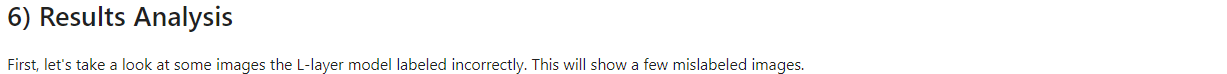

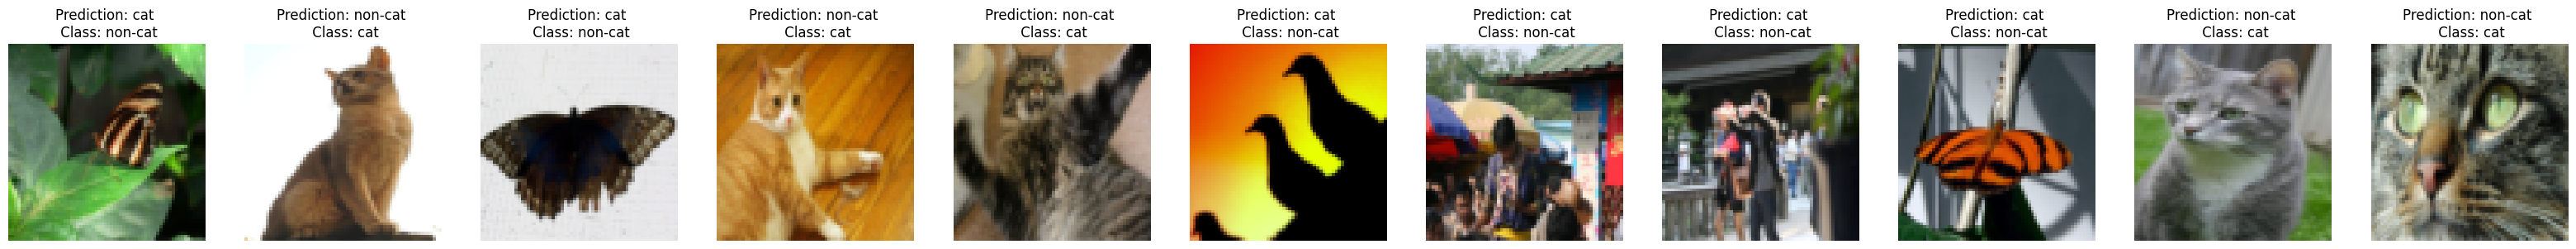

In [13]:
def print_mislabeled_images(classes, X, y, p):
    """
	绘制预测和实际不同的图像。
	    X - 数据集
	    y - 实际的标签
	    p - 预测
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


print_mislabeled_images(classes, test_x, test_y, pred_test)

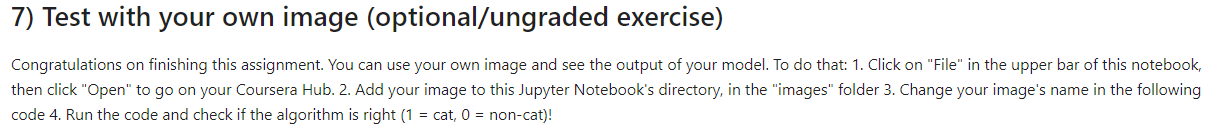

Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat


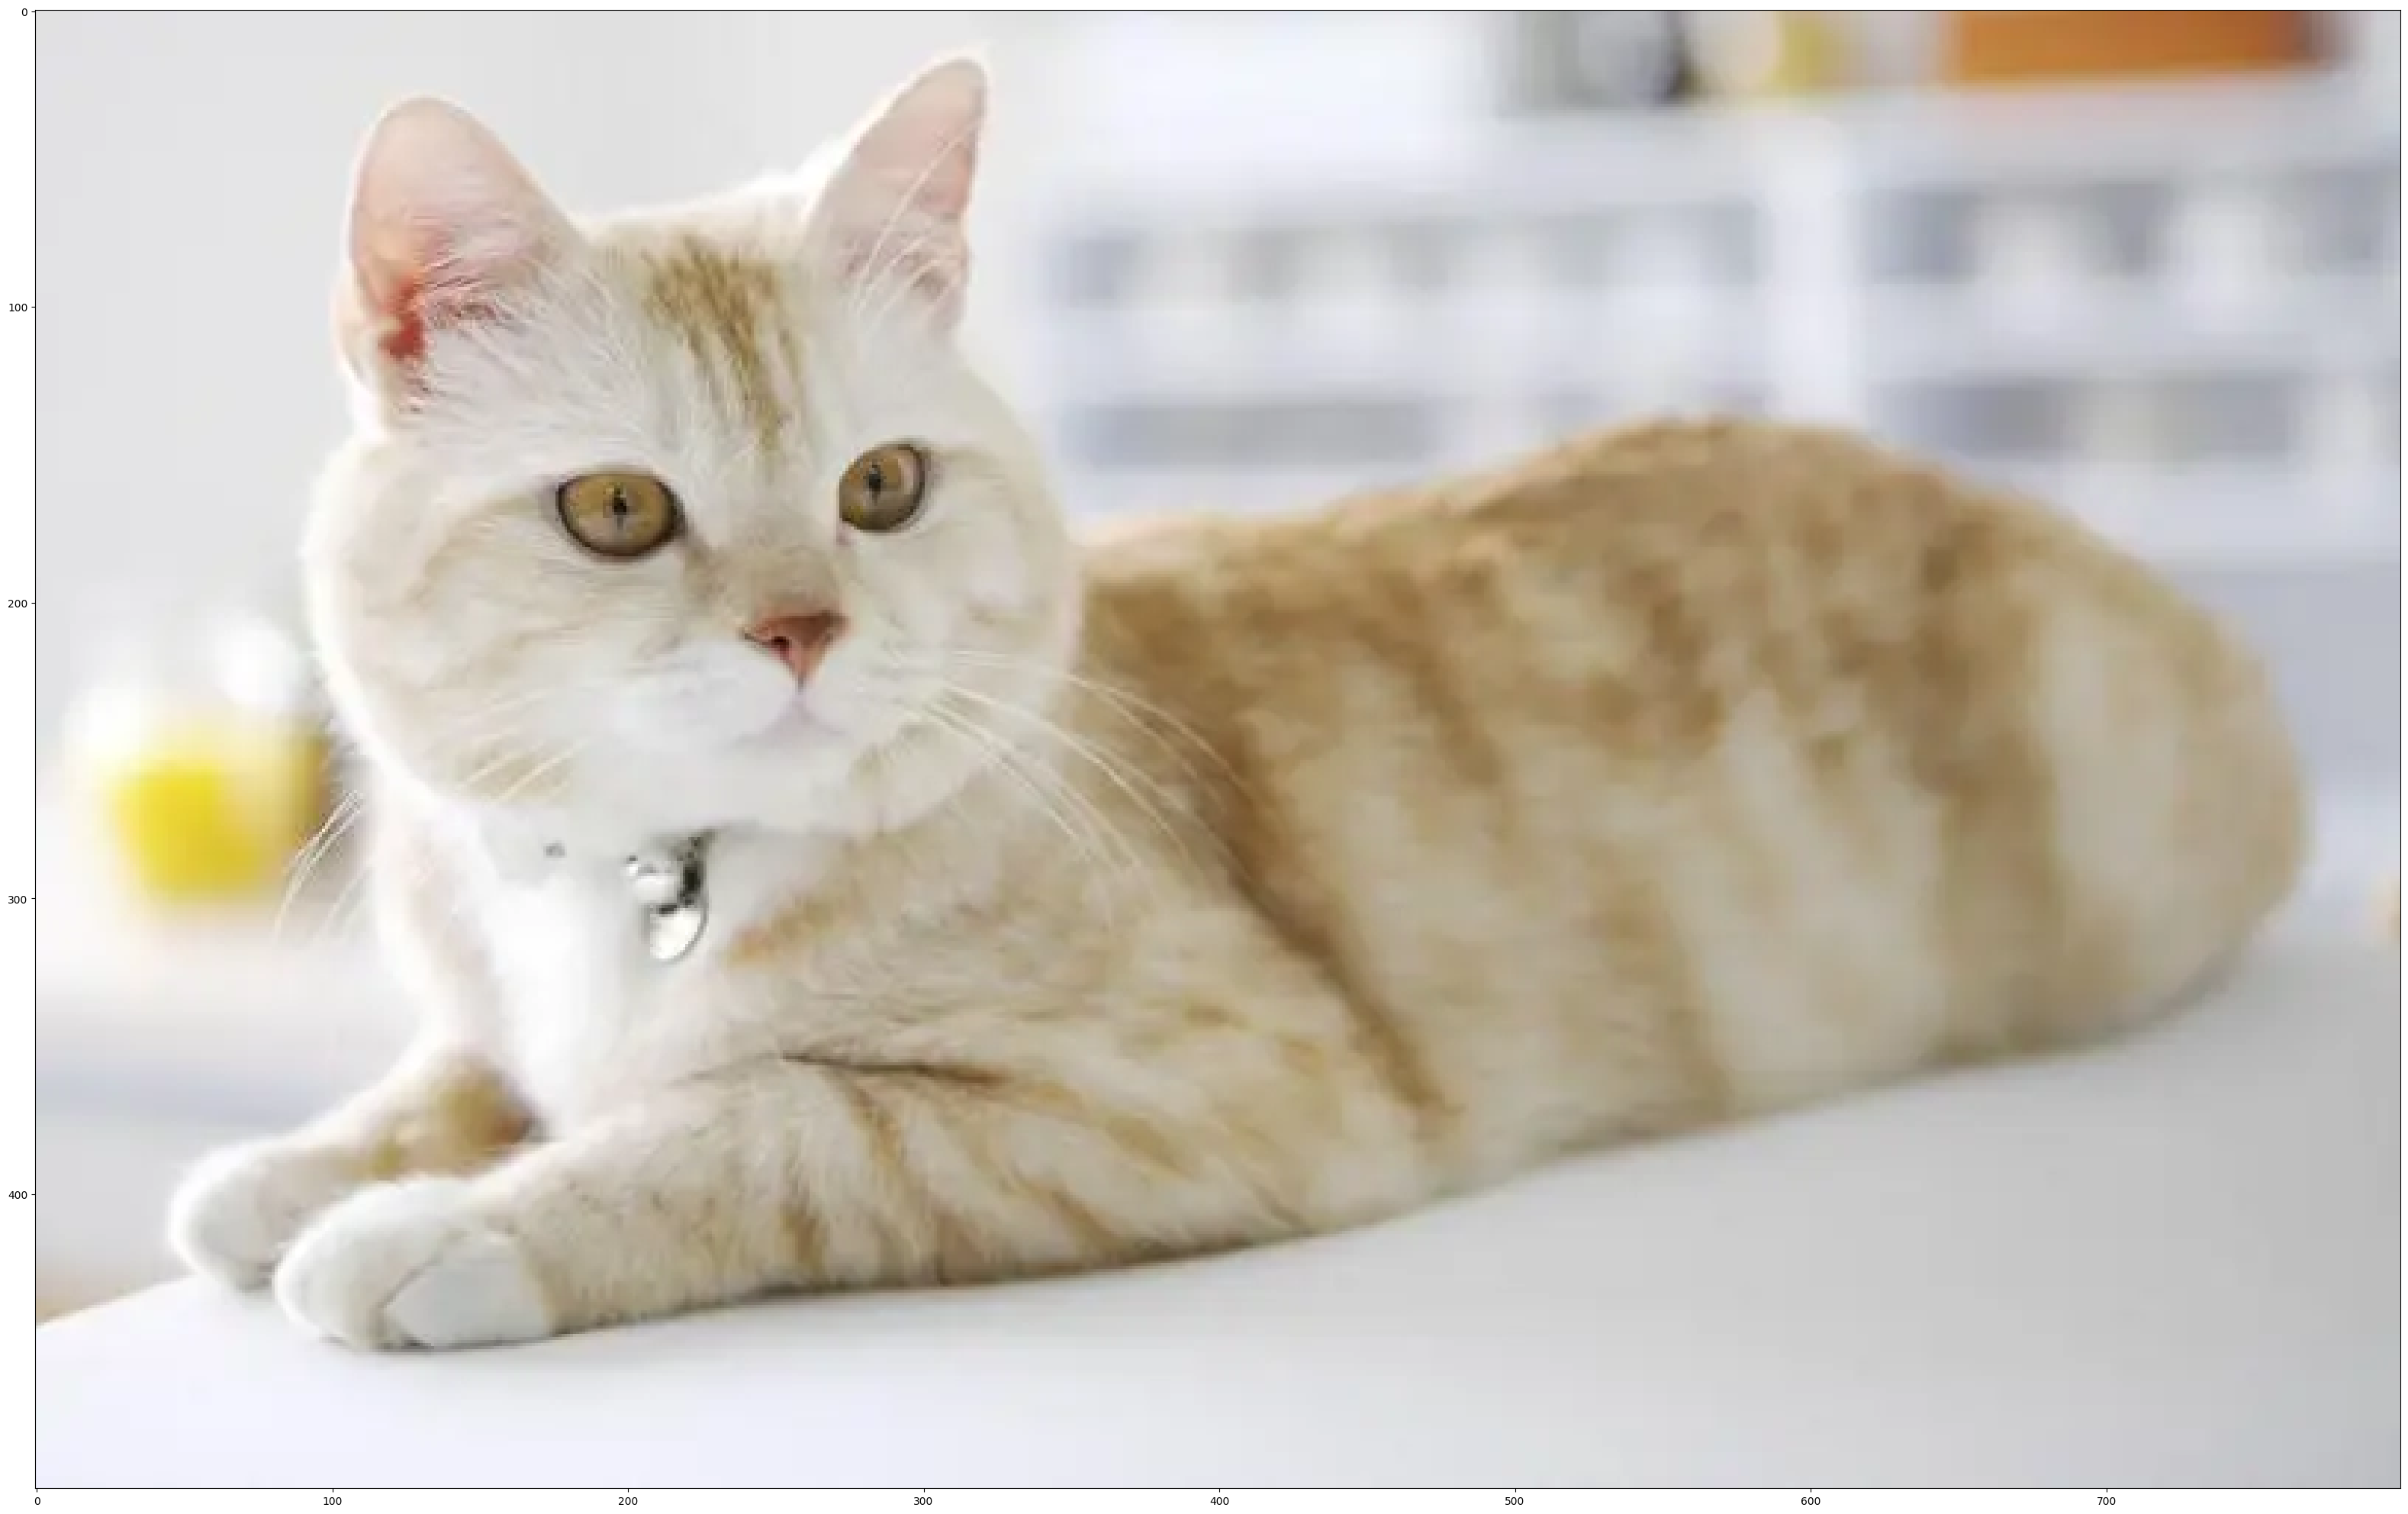

In [21]:
## START CODE HERE ##
my_image = "test.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = "images/" + my_image
# image = np.array(ndimage.imread(fname, flatten=False))
image = np.array(plt.imread(fname))
my_image = np.array(Image.fromarray(image).resize(size=(num_px,num_px))).reshape((1, num_px*num_px*3)).T
# my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters)
plt.imshow(my_image)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))